In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
# matplotlib.use("Agg")
import pylab
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import os
os.chdir("../../project/FLASH4.3_2/object/fat1000/")
G = 6.67e-8 #cgs
a = 28730.5 #cm/s

i =0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
margin = dim/3
start  = margin
end = dim-margin
cell_size = int((ds.domain_width/dim)[0].in_cgs())
print "cell size: ", cell_size
print end-start
print "looping through: ", (end-start)**3
boxlen = 1e19
ctr = boxlen/2
dr=cell_size
timestep=1

cell size:  39062500000000000
86
looping through:  636056


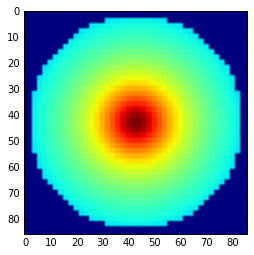

In [9]:
plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())

Looking at radius:  9.46073793756e+14
Looking at radius:  1.39942181651e+15
Looking at radius:  2.07000916151e+15
Looking at radius:  3.06193449192e+15
Looking at radius:  4.52917939066e+15
Looking at radius:  6.69951169986e+15
Looking at radius:  9.90984307425e+15
Looking at radius:  1.46585294803e+16
Looking at radius:  2.16827335121e+16
Looking at radius:  3.20728578667e+16
Looking at radius:  4.74418140665e+16
Looking at radius:  7.01754028681e+16
Looking at radius:  1.03802674172e+17
Looking at radius:  1.5354375928e+17
Looking at radius:  2.27120218258e+17
Looking at radius:  3.3595369674e+17
Looking at radius:  4.96938965713e+17
Looking at radius:  7.35066582211e+17
Looking at radius:  1.08730229981e+18
Looking at radius:  1.60832544939e+18
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


ValueError: Data has no positive values, and therefore can not be log-scaled.

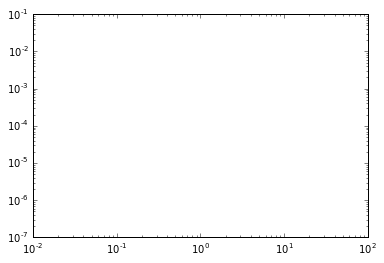

In [3]:
xi_range = np.logspace(-2,np.log10(17),num=20)
r_range = xi_range/1.057E-17
ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
#let dr = cell_size
xyzrange = np.arange(start,end)
sum_args_list = []
for ri in r_range:
    print "Looking at radius: ", ri
    sum_args = 0
    for i in xyzrange:
        for j in xyzrange:
            for k in xyzrange:
                r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
                if np.isclose(r,ri,atol=dr):#atol is +/-
#                     if r<ri:
                    #print "inside:" , r
                    sum_args+=r*dens_arr[i][j][k]*dr
    print sum_args
    sum_args_list.append(sum_args)
sum_args_list = np.array(sum_args_list)

print sum_args_list
plt.loglog(xi_range,4*np.pi*G*sum_args_list/a)
# plt.savefig('mass.png')

In [9]:
tlst =[1]
tlst.extend(np.arange(5,31,5))

In [ ]:
# plot_MR(30)

In [ ]:
for t in tlst:
    plot_MR(t)

In [10]:
256/3

85